In [6]:
# Import the necessary modules and libraries
import matplotlib.pyplot as plt
import numpy as np

from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.tree import DecisionTreeRegressor

rng = np.random.RandomState(21)

###############################################

def trueFunction(x): return np.sin(x)
    
###############################################

def getData(n=100, sigma=0.5):

    # Generate n random points on the x-axis
    data = np.sort(15 * rng.rand(n, 1), axis=0)
    
    # Get the true underlying function
    labels = trueFunction(data)
    
    # Add Gaussian noise
    noisylabels = np.add( labels, rng.normal(0.0, sigma, n).reshape(n, 1)  )
    
    return data, noisylabels

###############################################


In [11]:
def run( modeltype = 'knn', param = 7 ):

    # Get some training data
    traindata, trainlabels = getData(n=100)

    # Retrieve the full true underlying function as test data (i.e. the "population" risk)
    testdata = np.arange(0.0, 15, 0.01)[:, np.newaxis]
    testlabels = trueFunction(testdata)

    ####################################
    
    if modeltype=='knn':
        # Use k-NN
        model = KNeighborsRegressor(n_neighbors=param).fit(traindata, trainlabels)
    else:
        # Use decision tree
        model = DecisionTreeRegressor(max_depth=param).fit(traindata, trainlabels)

    ####################################
        
    # Get predictions
    predictedtestlabels = model.predict(testdata)

    plt.figure()
    print('Training error', mean_squared_error(model.predict(traindata),trainlabels))
    print('Testing error ', mean_squared_error(predictedtestlabels,testlabels))

    # True function
    plt.plot(testdata, testlabels, color='black', label='y(x)', linewidth=2)

    # Training data
    plt.scatter(traindata, trainlabels, s=20,  c="darkorange", label="data")

    # Model predictions
    plt.plot( testdata, predictedtestlabels, color="cornflowerblue", alpha=0.75, linewidth=4)

    plt.xlabel("x")
    plt.ylabel("y")
    plt.ylim(-2,2)

    plt.show()
    
###########################



Training error 0.1988084193832144
Testing error  0.10172262110953378


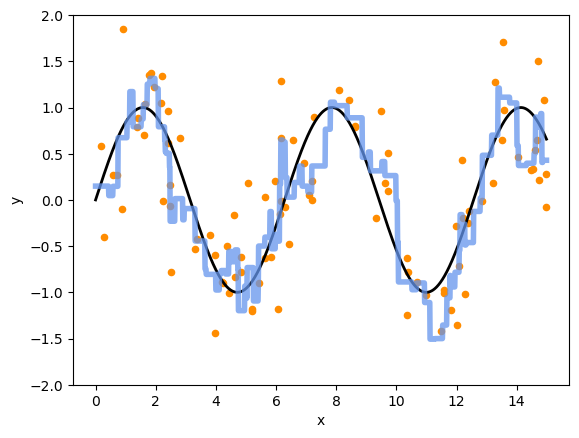

In [16]:
run( modeltype='knn', param = 3 )

Training error 0.15099516438797297
Testing error  0.1523487131789884


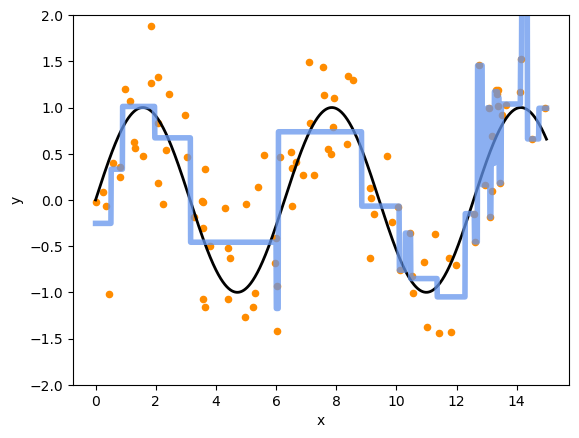

In [17]:
run( modeltype='tree', param = 5 )